# Endterm <hr style ="border:2.5px solid yellow"></hr>



Name: **Kyla B. Torrendon** <br>
Course: **CPE2A**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load Dataset

In [2]:
df=pd.read_csv(r"..\raw\spotify_songs.csv", 
                delimiter=",")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

Inspect Dataset

In [3]:
print(df.info())
print(df.describe())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

Check if there are any NaN values in dataset

In [4]:
print(df.isna().sum()) 

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64


Display Rows with NaN Values

In [5]:
nan_rows = df[df.isna().any(axis=1)]
print(nan_rows)

                     track_id track_name track_artist  track_popularity  \
8151   69gRFGOWY9OMpFJgFol1u0        NaN          NaN                 0   
9282   5cjecvX0CmC9gK0Laf5EMQ        NaN          NaN                 0   
9283   5TTzhRSWQS4Yu8xTgAuq6D        NaN          NaN                 0   
19568  3VKFip3OdAvv4OfNTgFWeQ        NaN          NaN                 0   
19811  69gRFGOWY9OMpFJgFol1u0        NaN          NaN                 0   

               track_album_id track_album_name track_album_release_date  \
8151   717UG2du6utFe7CdmpuUe3              NaN               2012-01-05   
9282   3luHJEPw434tvNbme3SP8M              NaN               2017-12-01   
9283   3luHJEPw434tvNbme3SP8M              NaN               2017-12-01   
19568  717UG2du6utFe7CdmpuUe3              NaN               2012-01-05   
19811  717UG2du6utFe7CdmpuUe3              NaN               2012-01-05   

            playlist_name             playlist_id playlist_genre  ... key  \
8151              HIP

Count Total NaN Values

In [6]:
total_nans = df.isna().sum().sum()
print(f"Total NaN values in dataset: {total_nans}")

Total NaN values in dataset: 15


Check If the Dataset Has Any NaN (Boolean)

In [7]:
print(df.isna().any().any())

True


Remove Duplicates

In [8]:
df.drop_duplicates(inplace=True)

Drop All Rows with NaN Values

In [9]:
df = df.dropna()

In [10]:
df.count()

track_id                    32828
track_name                  32828
track_artist                32828
track_popularity            32828
track_album_id              32828
track_album_name            32828
track_album_release_date    32828
playlist_name               32828
playlist_id                 32828
playlist_genre              32828
playlist_subgenre           32828
danceability                32828
energy                      32828
key                         32828
loudness                    32828
mode                        32828
speechiness                 32828
acousticness                32828
instrumentalness            32828
liveness                    32828
valence                     32828
tempo                       32828
duration_ms                 32828
dtype: int64

Count NaN values. (To recheck if the NaN values has been dropped)

In [11]:
df.isna().sum().sum()

np.int64(0)

Save Cleaned Dataset

In [12]:
df.to_csv("cleaned_dataset.csv", index=False)

print("Dataset cleaned and saved as 'cleaned_dataset.csv'.")

Dataset cleaned and saved as 'cleaned_dataset.csv'.


Top 1 Most Popular Song

In [13]:
import pandas as pd

df = pd.read_csv("cleaned_dataset.csv")

most_popular_song = df.loc[df['track_popularity'].idxmax()]

print(f"🎵 The most streamed song is '{most_popular_song['track_name']}' by {most_popular_song['track_artist']} with a popularity score of {most_popular_song['track_popularity']}.")

🎵 The most streamed song is 'Dance Monkey' by Tones and I with a popularity score of 100.


## Top 10 Most Popular Songs

In [14]:
import pandas as pd

df = pd.read_csv("cleaned_dataset.csv")

df = df.sort_values(by='track_popularity', ascending=False).drop_duplicates(subset='track_name', keep='first')

top_10_songs = df[['track_name', 'track_artist', 'track_popularity']].sort_values(by='track_popularity', ascending=False).head(10)

print("🎵 Top 10 Most Popular Songs:")
print(top_10_songs)


🎵 Top 10 Most Popular Songs:
                track_name    track_artist  track_popularity
20086         Dance Monkey     Tones and I               100
20087              ROXANNE  Arizona Zervas                99
5508               The Box     Roddy Ricch                98
716        Blinding Lights      The Weeknd                98
711               Memories        Maroon 5                98
687                   Tusa         KAROL G                98
19736              Circles     Post Malone                98
9140               Falling   Trevor Daniel                97
21555      Don't Start Now        Dua Lipa                97
5261   everything i wanted   Billie Eilish                97


Top 10 Most Popular Songs:
                track_name    track_artist  track_popularity
20086         Dance Monkey     Tones and I               100
20087              ROXANNE  Arizona Zervas                99
5508               The Box     Roddy Ricch                98
716        Blinding Lights      The Weeknd                98
711               Memories        Maroon 5                98
687                   Tusa         KAROL G                98
19736              Circles     Post Malone                98
9140               Falling   Trevor Daniel                97
21555      Don't Start Now        Dua Lipa                97
5261   everything i wanted   Billie Eilish                97


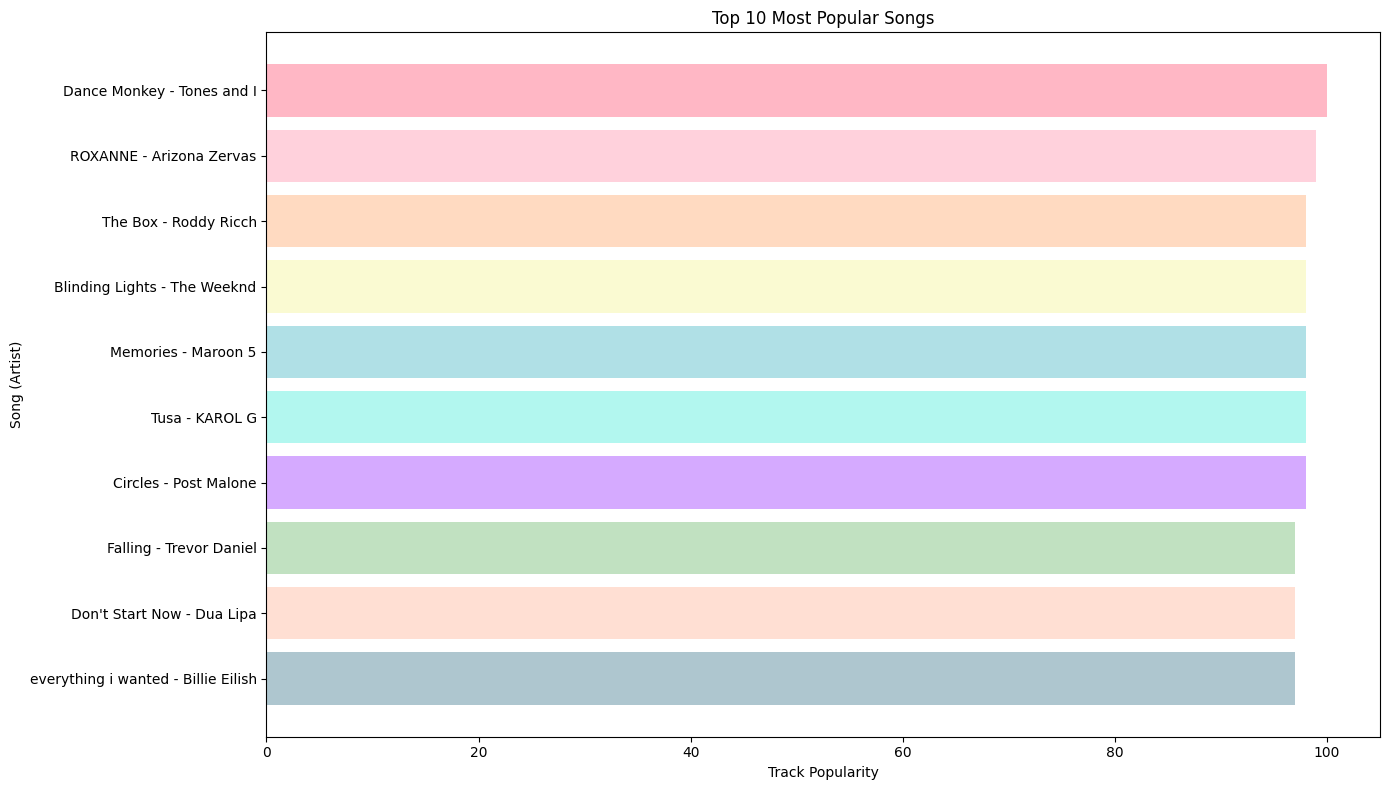

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('cleaned_dataset.csv')

required_columns = {'track_name', 'track_artist', 'track_popularity'}
if not required_columns.issubset(df.columns):
    raise ValueError(f"Dataset must contain the following columns: {required_columns}")

df = df.sort_values(by='track_popularity', ascending=False).drop_duplicates(subset='track_name', keep='first')

top_10_songs = df[['track_name', 'track_artist', 'track_popularity']].sort_values(by='track_popularity', ascending=False).head(10)

print("Top 10 Most Popular Songs:")
print(top_10_songs)

pastel_colors = [
    "#FFB7C5", "#FFD1DC", "#FFDAC1", "#FAFAD2", "#B0E0E6",
    "#B2F7EF", "#D5AAFF", "#C1E1C1", "#FFDFD3", "#AEC6CF"
]

plt.figure(figsize=(14, 8))
plt.barh(
    top_10_songs['track_name'] + ' - ' + top_10_songs['track_artist'],
    top_10_songs['track_popularity'],
    color=pastel_colors  
)
plt.xlabel('Track Popularity')
plt.ylabel('Song (Artist)')
plt.title('Top 10 Most Popular Songs')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Top 10 Most Popular Artists

In [16]:
import pandas as pd

df = pd.read_csv("cleaned_dataset.csv")

most_popular_artist = df.groupby('track_artist')['track_popularity'].sum().sort_values(ascending=False).reset_index()

print("🎤 Top 10 Most Popular Artists (Total Popularity):")
print(most_popular_artist.head(10))


🎤 Top 10 Most Popular Artists (Total Popularity):
       track_artist  track_popularity
0     Martin Garrix              7600
1  The Chainsmokers              7097
2      David Guetta              5878
3             Queen              5848
4     Calvin Harris              5625
5              Kygo              5405
6        Ed Sheeran              5122
7             Drake              4643
8        The Weeknd              4304
9            Khalid              4292


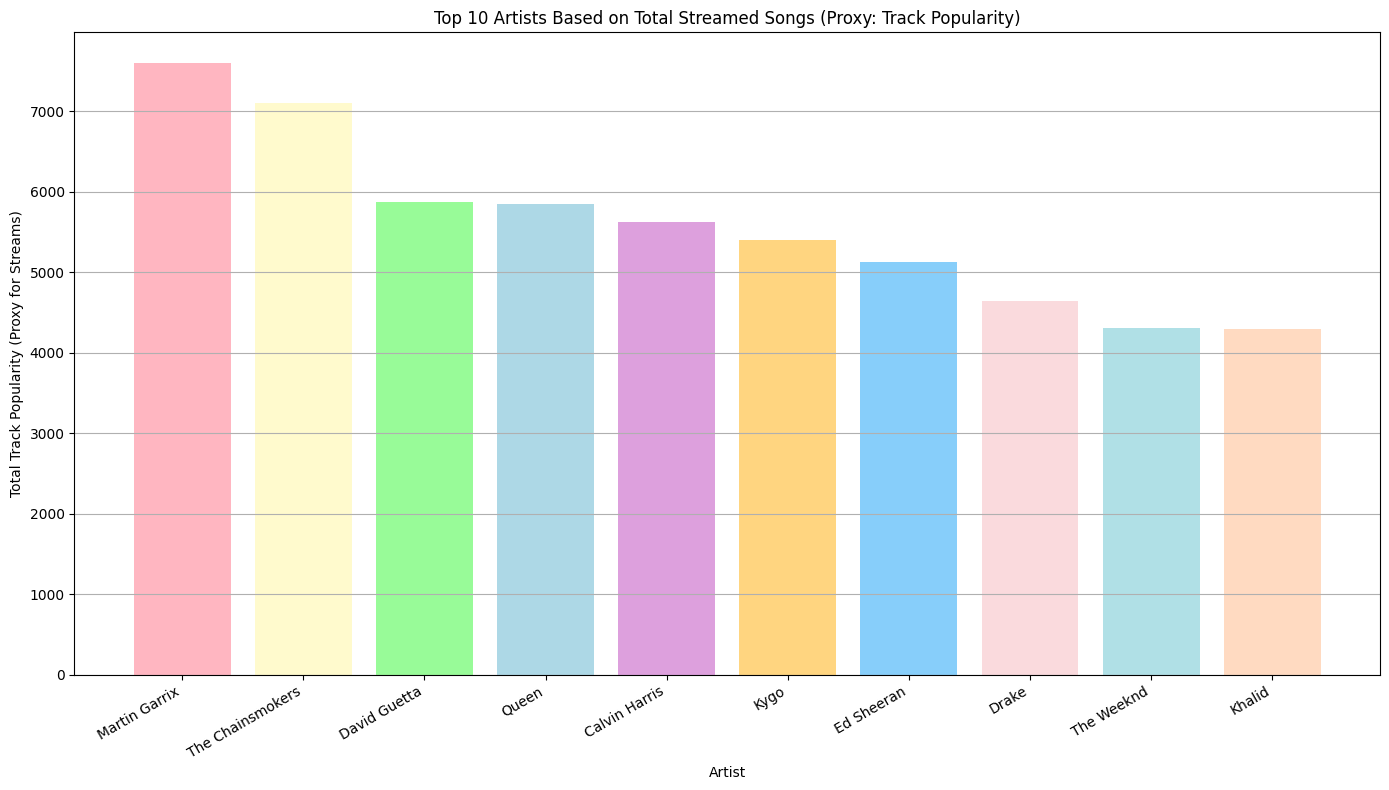

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

top_artists_by_streams = df.groupby('track_artist')['track_popularity'].sum().sort_values(ascending=False).head(10)

pastel_colors = ['#FFB6C1', '#FFFACD', '#98FB98', '#ADD8E6', '#DDA0DD', '#FFD580', '#87CEFA', '#FADADD', '#B0E0E6', '#FFDAC1']

plt.figure(figsize=(14, 8))
plt.bar(top_artists_by_streams.index, top_artists_by_streams.values, color=pastel_colors)
plt.title('Top 10 Artists Based on Total Streamed Songs (Proxy: Track Popularity)')
plt.xlabel('Artist')
plt.ylabel('Total Track Popularity (Proxy for Streams)')
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## Number of Tracks Released per Year

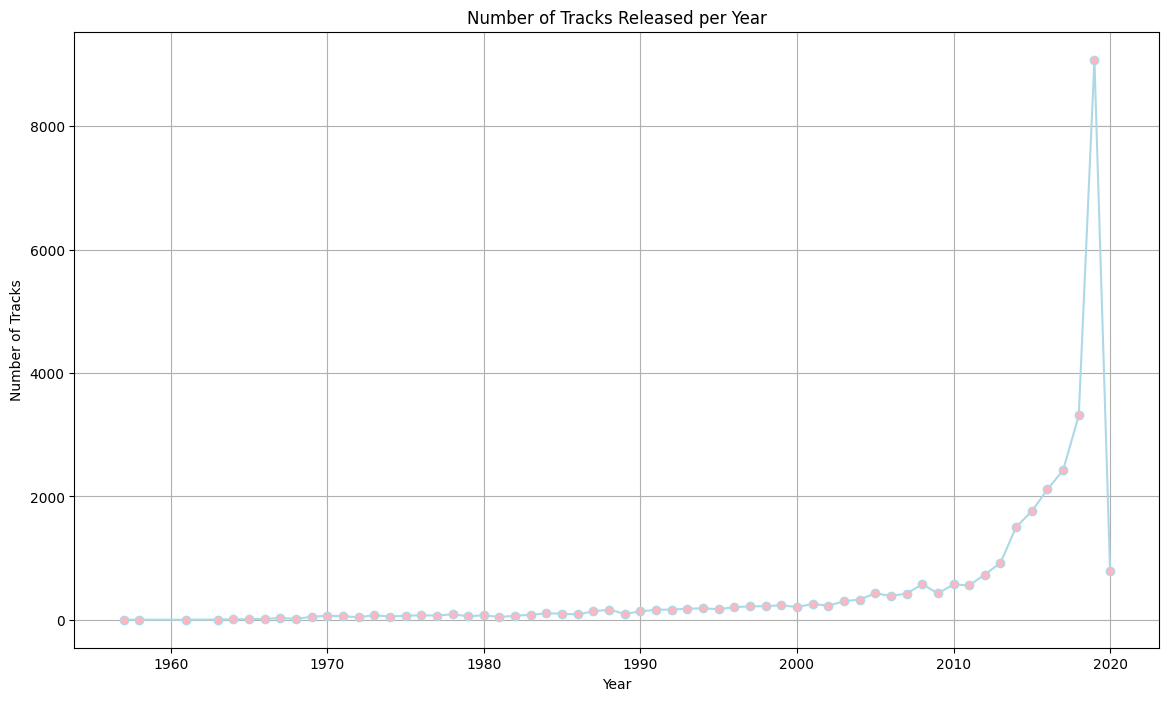

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('cleaned_dataset.csv')

df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'], errors='coerce')

df = df.dropna(subset=['track_album_release_date'])

df['release_year'] = df['track_album_release_date'].dt.year

release_trends = df['release_year'].value_counts().sort_index()

pastel_blue = '#ADD8E6'
pastel_pink = '#FFB6C1'

plt.figure(figsize=(14, 8))
plt.plot(release_trends.index, release_trends.values, marker='o', color=pastel_blue, markerfacecolor=pastel_pink)
plt.title('Number of Tracks Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Tracks')
plt.grid(True)
plt.show()


## Mood Distribution Based on Valence and Energy

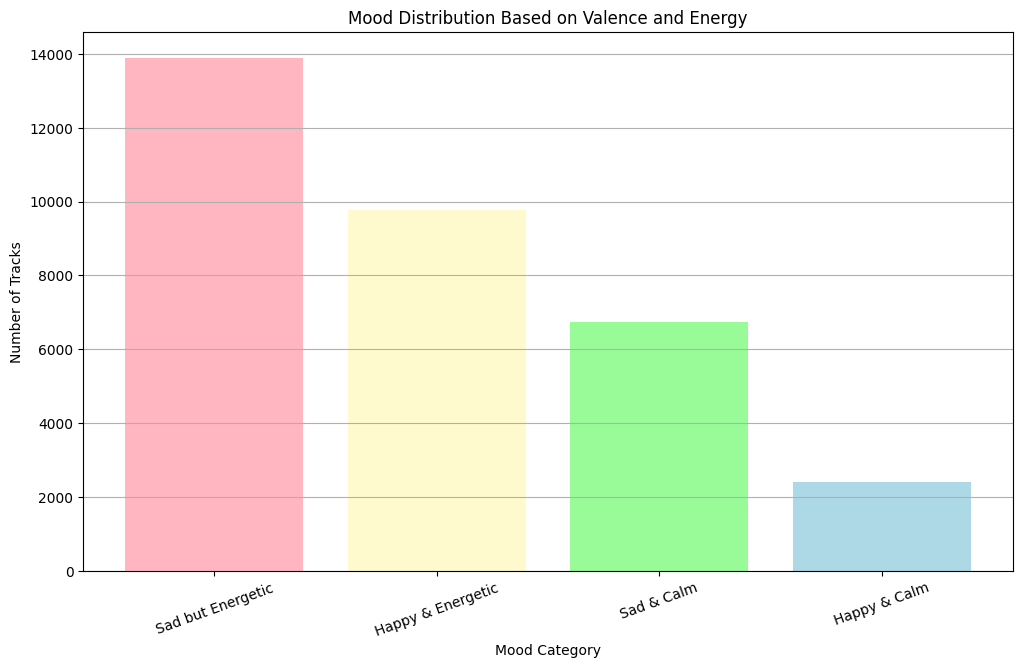

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('cleaned_dataset.csv')

if not {'valence', 'energy', 'danceability'}.issubset(df.columns):
    raise ValueError("Dataset must contain 'valence', 'energy', and 'danceability' columns.")

def categorize_mood(row):
    if row['valence'] > 0.6 and row['energy'] > 0.6:
        return 'Happy & Energetic'
    elif row['valence'] > 0.6 and row['energy'] <= 0.6:
        return 'Happy & Calm'
    elif row['valence'] <= 0.6 and row['energy'] > 0.6:
        return 'Sad but Energetic'
    else:
        return 'Sad & Calm'

df['mood'] = df.apply(categorize_mood, axis=1)

mood_counts = df['mood'].value_counts()

pastel_colors = ['#FFB6C1', '#FFFACD', '#98FB98', '#ADD8E6', '#DDA0DD', '#FFD580']

plt.figure(figsize=(12, 7))
plt.bar(mood_counts.index, mood_counts.values, color=pastel_colors[:len(mood_counts)])
plt.title('Mood Distribution Based on Valence and Energy')
plt.xlabel('Mood Category')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=20)
plt.grid(axis='y')
plt.show()


## Distribution of Musical Keys 

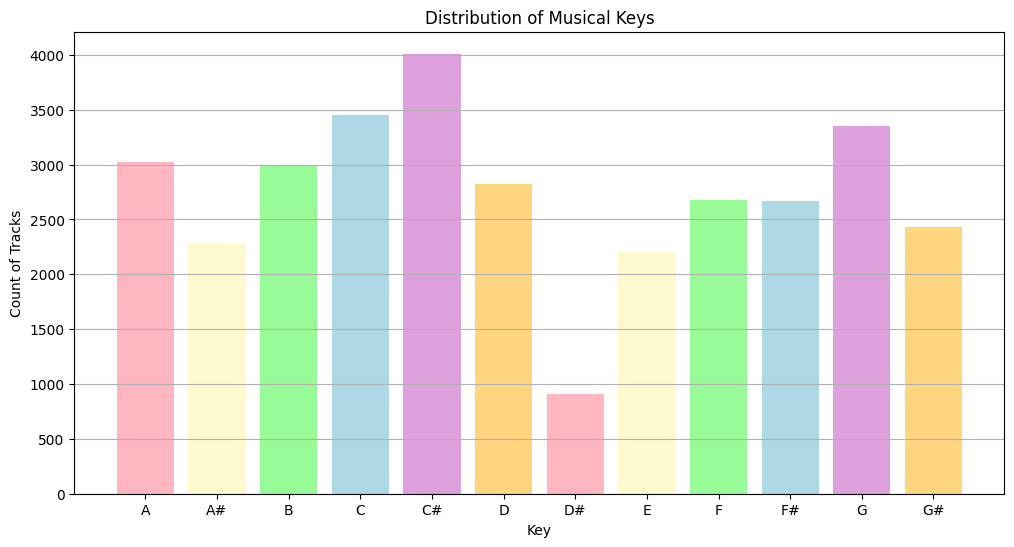

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('cleaned_dataset.csv')

pastel_colors = ['#FFB6C1', '#FFFACD', '#98FB98', '#ADD8E6', '#DDA0DD', '#FFD580']

key_mapping = {
    0: 'C', 1: 'C#', 2: 'D', 3: 'D#', 4: 'E', 5: 'F', 6: 'F#',
    7: 'G', 8: 'G#', 9: 'A', 10: 'A#', 11: 'B'
}
df['key_name'] = df['key'].map(key_mapping)

key_counts = df['key_name'].value_counts().sort_index()

colors = (pastel_colors * (len(key_counts) // len(pastel_colors) + 1))[:len(key_counts)]

plt.figure(figsize=(12, 6))
plt.bar(key_counts.index, key_counts.values, color=colors)
plt.title('Distribution of Musical Keys')
plt.xlabel('Key')
plt.ylabel('Count of Tracks')
plt.grid(axis='y')
plt.show()


## Average Acousticness and Instrumentality by Genre

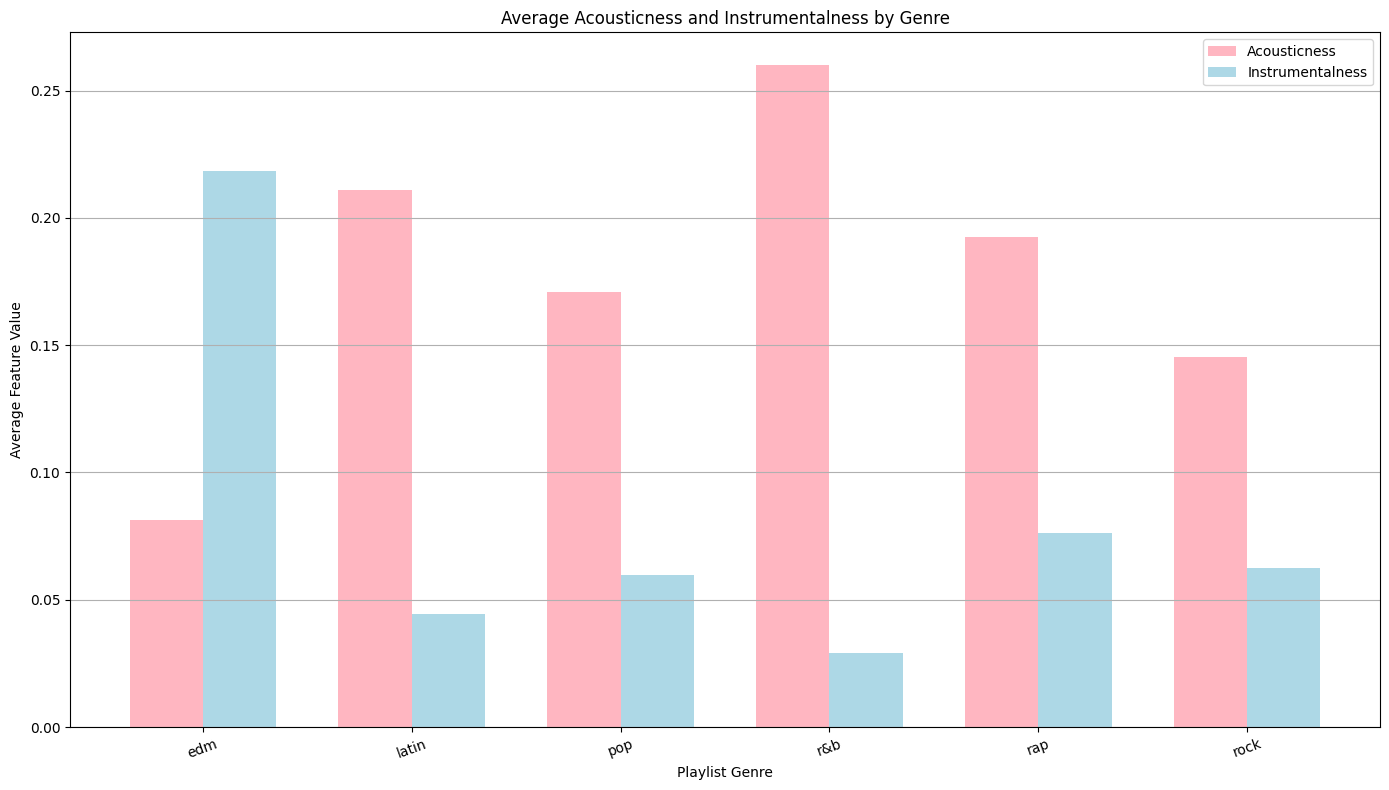

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('cleaned_dataset.csv')

if not {'acousticness', 'instrumentalness', 'playlist_genre'}.issubset(df.columns):
    raise ValueError("Dataset must contain 'acousticness', 'instrumentalness', and 'playlist_genre' columns.")

genre_features = df.groupby('playlist_genre')[['acousticness', 'instrumentalness']].mean()

pastel_colors = ['#FFB6C1', '#FFFACD', '#98FB98', '#ADD8E6', '#DDA0DD', '#FFD580']

plt.figure(figsize=(14, 8))
bar_width = 0.35
index = range(len(genre_features))

plt.bar(index, genre_features['acousticness'], bar_width, label='Acousticness', color=pastel_colors[0])
plt.bar([i + bar_width for i in index], genre_features['instrumentalness'], bar_width, label='Instrumentalness', color=pastel_colors[3])

plt.xlabel('Playlist Genre')
plt.ylabel('Average Feature Value')
plt.title('Average Acousticness and Instrumentalness by Genre')
plt.xticks([i + bar_width / 2 for i in index], genre_features.index, rotation=20)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## Average Track Popularity by Genre

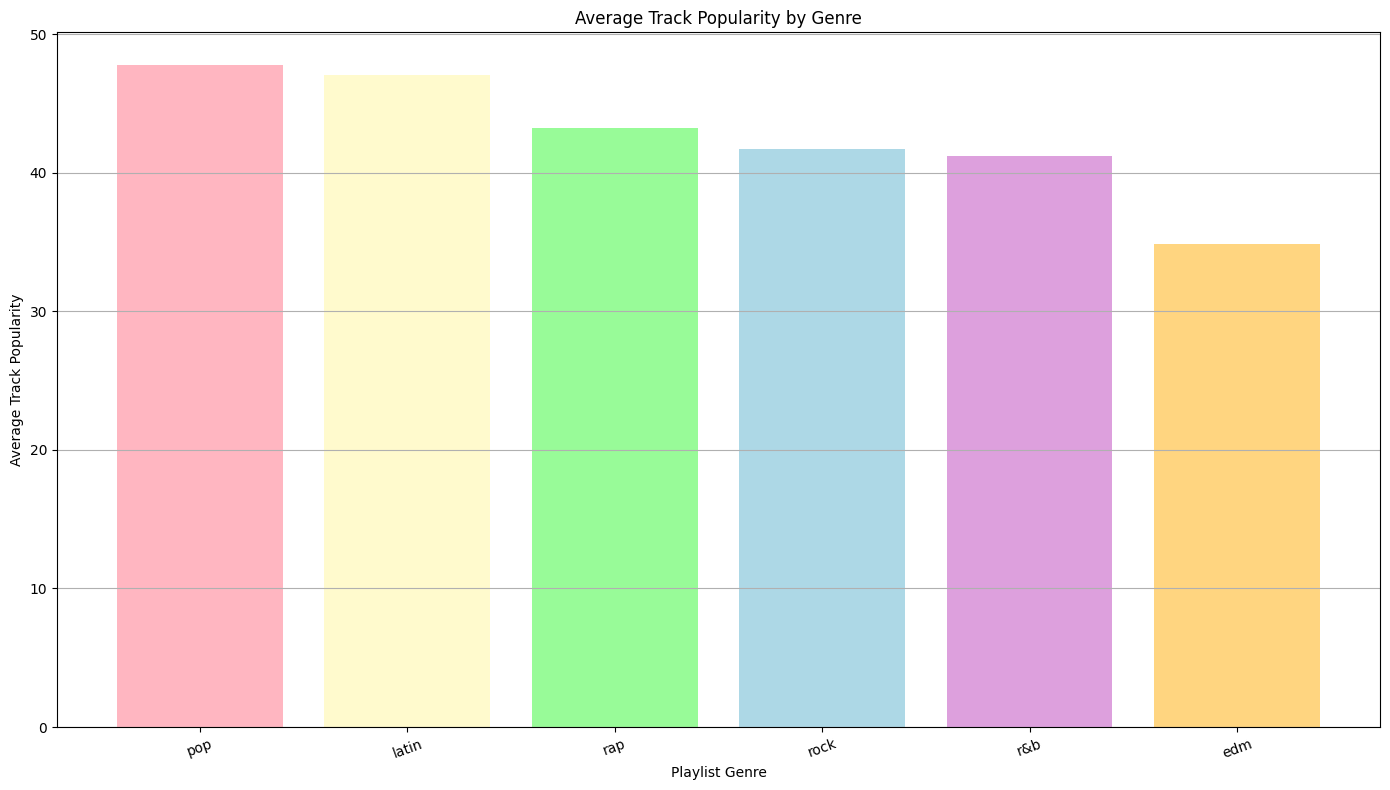

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('cleaned_dataset.csv')

if not {'playlist_genre', 'track_popularity'}.issubset(df.columns):
    raise ValueError("Dataset must contain 'playlist_genre' and 'track_popularity' columns.")

genre_popularity = df.groupby('playlist_genre')['track_popularity'].mean().sort_values(ascending=False)

pastel_colors = ['#FFB6C1', '#FFFACD', '#98FB98', '#ADD8E6', '#DDA0DD', '#FFD580']

colors = (pastel_colors * (len(genre_popularity) // len(pastel_colors) + 1))[:len(genre_popularity)]

plt.figure(figsize=(14, 8))
plt.bar(genre_popularity.index, genre_popularity.values, color=colors)
plt.xlabel('Playlist Genre')
plt.ylabel('Average Track Popularity')
plt.title('Average Track Popularity by Genre')
plt.xticks(rotation=20)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## Average Track Popularity by Subgenre

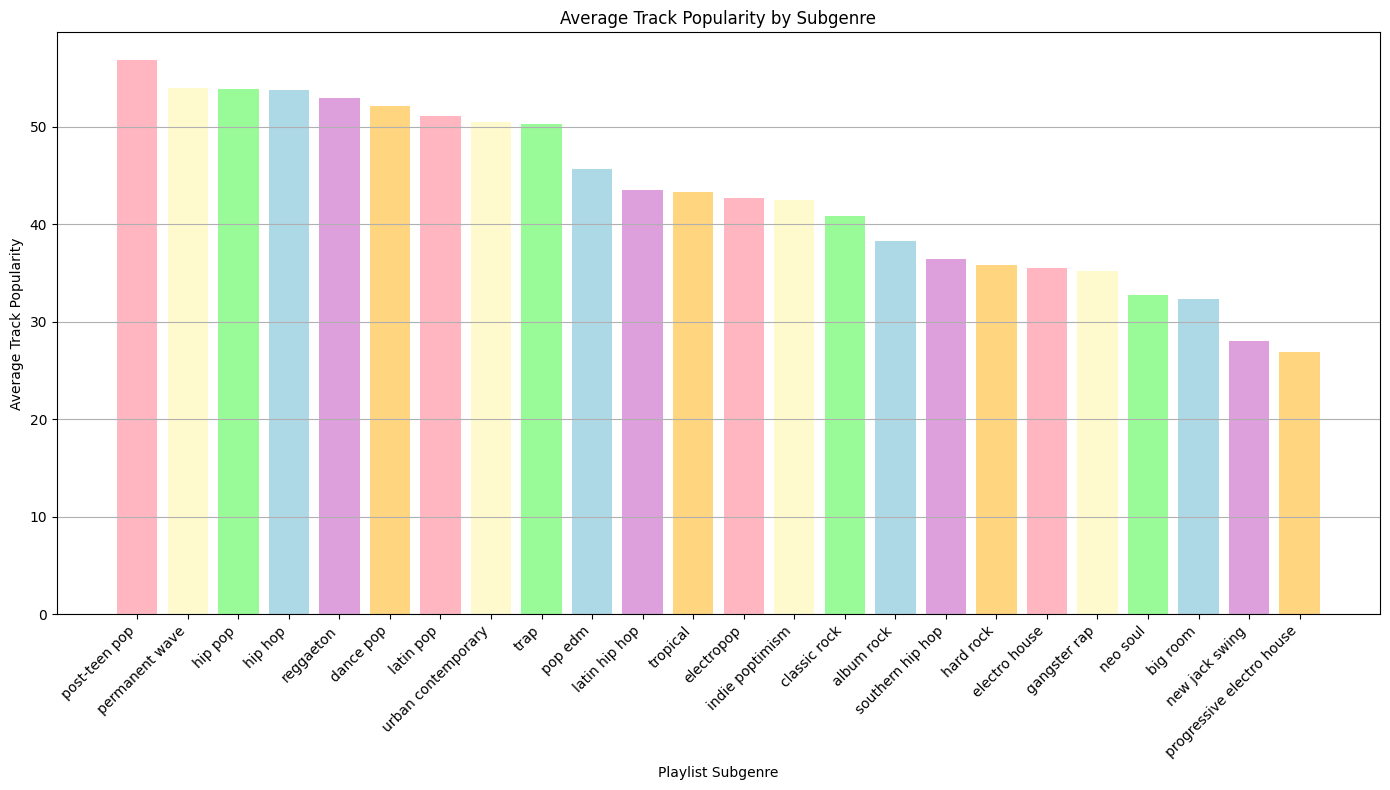

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('cleaned_dataset.csv')

if not {'playlist_subgenre', 'track_popularity'}.issubset(df.columns):
    raise ValueError("Dataset must contain 'playlist_subgenre' and 'track_popularity' columns")

subgenre_popularity = df.groupby('playlist_subgenre')['track_popularity'].mean().sort_values(ascending=False)

pastel_colors = ['#FFB6C1', '#FFFACD', '#98FB98', '#ADD8E6', '#DDA0DD', '#FFD580']
while len(pastel_colors) < len(subgenre_popularity):
    pastel_colors *= 2  
pastel_colors = pastel_colors[:len(subgenre_popularity)]  

plt.figure(figsize=(14, 8))
plt.bar(subgenre_popularity.index, subgenre_popularity.values, color=pastel_colors)
plt.xlabel('Playlist Subgenre')
plt.ylabel('Average Track Popularity')
plt.title('Average Track Popularity by Subgenre')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Check if subgenre exists and inspect unique values

In [24]:
if 'playlist_subgenre' in df.columns:
    print("Column 'playlist_subgenre' exists.")
    print("\nUnique subgenres:")
    print(df['playlist_subgenre'].unique())
else:
    print("Column 'playlist_subgenre' does not exist in the dataset.")


Column 'playlist_subgenre' exists.

Unique subgenres:
['dance pop' 'post-teen pop' 'electropop' 'indie poptimism' 'hip hop'
 'southern hip hop' 'gangster rap' 'trap' 'album rock' 'classic rock'
 'permanent wave' 'hard rock' 'tropical' 'latin pop' 'reggaeton'
 'latin hip hop' 'urban contemporary' 'hip pop' 'new jack swing'
 'neo soul' 'electro house' 'big room' 'pop edm'
 'progressive electro house']


## Top 10 Most Popular Albums (by Total Track Popularity)

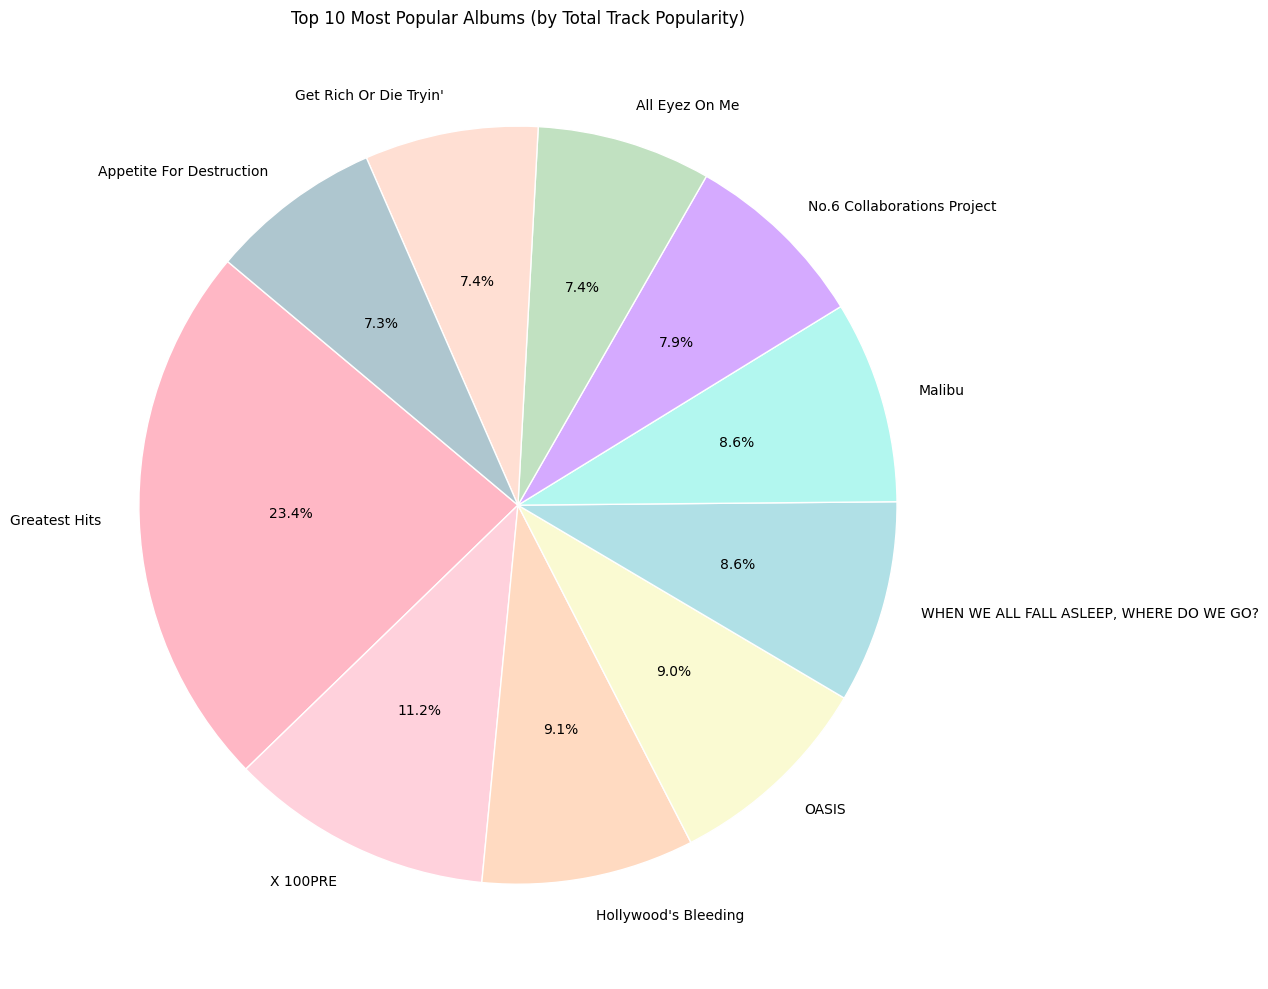

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("cleaned_dataset.csv")

if not {'track_album_name', 'track_popularity'}.issubset(df.columns):
    raise ValueError("Dataset must contain 'track_album_name' and 'track_popularity' columns.")

top_10_albums = df.groupby('track_album_name')['track_popularity'].sum().sort_values(ascending=False).head(10)

pastel_colors = [
    "#FFB7C5", "#FFD1DC", "#FFDAC1", "#FAFAD2", "#B0E0E6",
    "#B2F7EF", "#D5AAFF", "#C1E1C1", "#FFDFD3", "#AEC6CF"
]

plt.figure(figsize=(12, 10))
plt.pie(
    top_10_albums,
    labels=top_10_albums.index,
    autopct='%1.1f%%',
    colors=pastel_colors,
    startangle=140,
    wedgeprops={'edgecolor': 'white'}
)
plt.title('Top 10 Most Popular Albums (by Total Track Popularity)')
plt.tight_layout()
plt.show()


## Hypothesis

Several hypotheses can be explored to understand the relationship between track popularity, playlist placement, and album attributes. One possible hypothesis is that songs included in multiple playlists tend to have higher popularity scores, as increased exposure leads to more streams and greater listener engagement. Additionally, the release date of an album may influence a track’s popularity, with newer albums generally performing better due to promotional efforts and algorithmic boosts. Another hypothesis is that tracks by well-established artists have higher popularity scores compared to those by emerging artists, as larger fan bases and stronger marketing strategies contribute to greater reach. Furthermore, songs featured in editorial playlists, which are curated by streaming platforms, may have higher popularity than those in user-generated playlists since they receive more visibility and promotion. Lastly, tracks released as singles could be more popular than album-only songs, as singles are often strategically released and heavily marketed. By testing these hypotheses, valuable insights can be gained into the factors that drive music popularity and listener engagement.


## Conclusion

The data visualizations collectively highlight key trends in contemporary music consumption, production, and engagement. The analysis reveals a relatively even distribution of popularity among top-charting songs, while streaming data underscores the dominance of specific artists like Martin Garrix. The exponential growth in track releases from 2010 to 2020 signals a fundamental shift in the industry, likely driven by digital platforms and technological advancements. Genre analysis showcases distinct listener preferences, with pop and Latin music leading in popularity, while EDM exhibits lower engagement. Emotional categorization emphasizes a strong audience preference for high-energy yet melancholic tracks. Additionally, key signature distribution suggests compositional trends, favoring sharp keys like C# and G. The dominance of compilation albums, particularly "Greatest Hits," highlights the enduring appeal of curated collections. Overall, the findings provide valuable insights for industry strategists, streaming platforms, and content creators in optimizing music production, marketing, and recommendation systems.